# Data Mining Team.8 :: Africa Heart Disease

## 00. Import Libraries & Load Data

In [194]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [205]:
df = pd.read_csv('C:/Users/choijumsun/Desktop/데마 팀플/SAHeart.csv')

df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [206]:
# row.names 열 제거
df = df.drop('row.names',axis=1)
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sbp,462.0,138.326840,20.496317,101.00,124.0000,134.000,148.0000,218.00
tobacco,462.0,3.635649,4.593024,0.00,0.0525,2.000,5.5000,31.20
ldl,462.0,4.740325,2.070909,0.98,3.2825,4.340,5.7900,15.33
adiposity,462.0,25.406732,7.780699,6.74,19.7750,26.115,31.2275,42.49
typea,462.0,53.103896,9.817534,13.00,47.0000,53.000,60.0000,78.00
obesity,462.0,26.044113,4.213680,14.70,22.9850,25.805,28.4975,46.58
alcohol,462.0,17.044394,24.481059,0.00,0.5100,7.510,23.8925,147.19
age,462.0,42.816017,14.608956,15.00,31.0000,45.000,55.0000,64.00
chd,462.0,0.346320,0.476313,0.00,0.0000,0.000,1.0000,1.00


## 02. EDA

In [208]:
## 글꼴설정
import matplotlib as mpl
import matplotlib.pylab as plt

# 한글깨짐 해결
plt.rcParams["font.family"] = "NanumGothic"

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

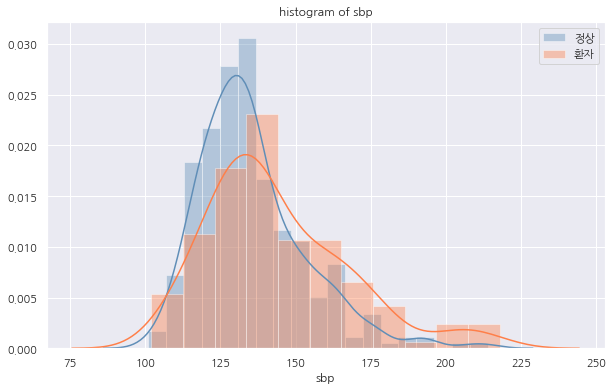

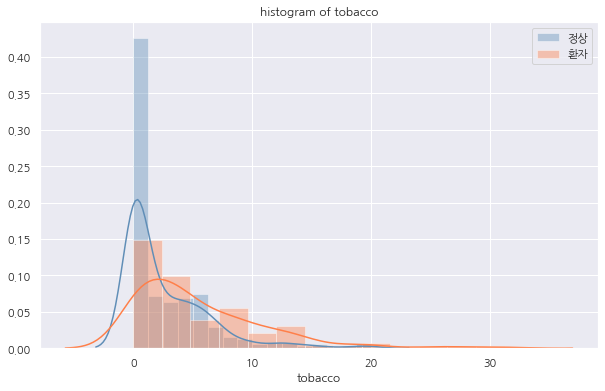

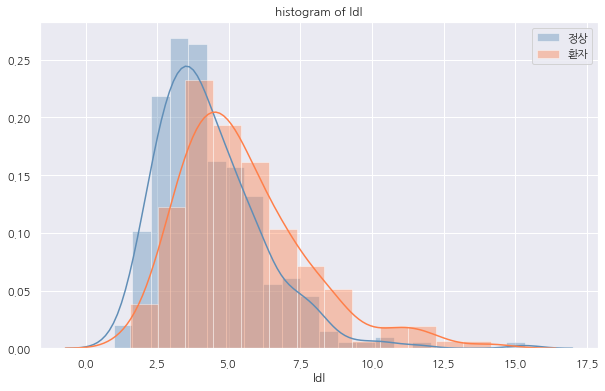

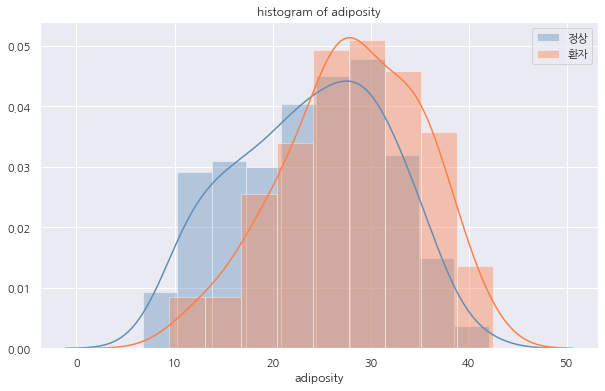

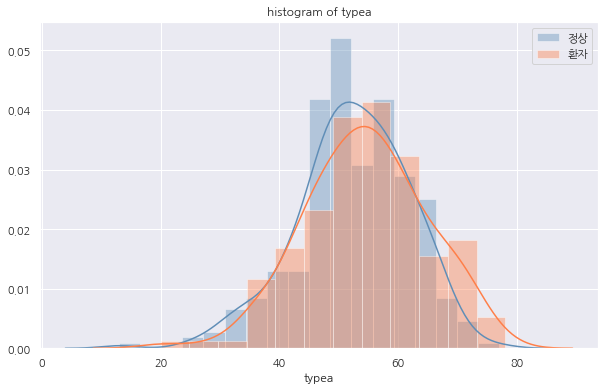

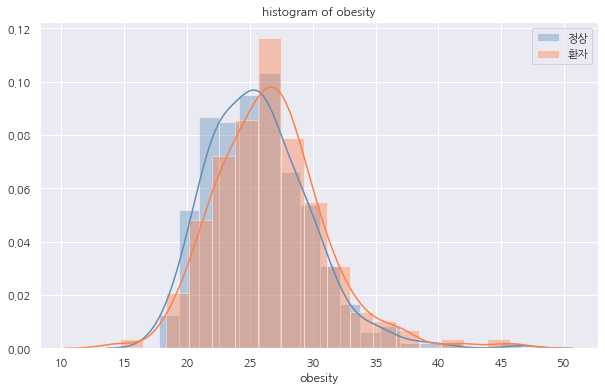

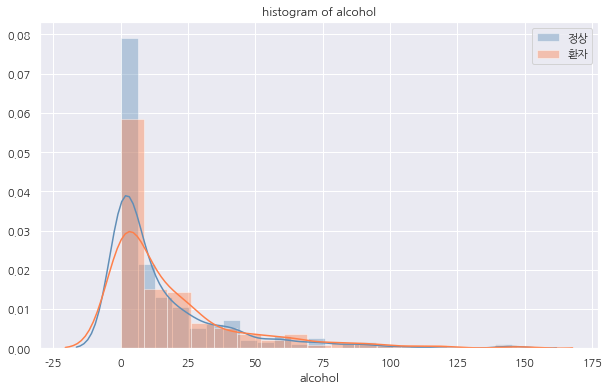

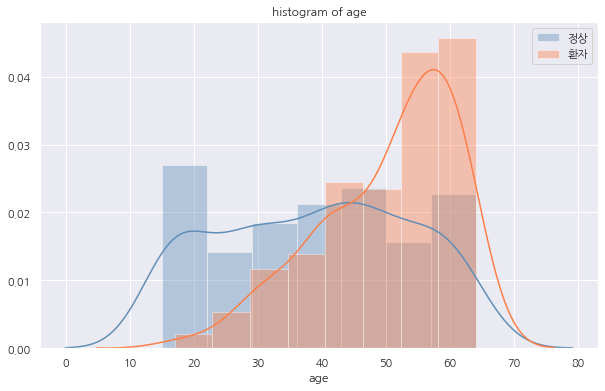

In [210]:
numeric_feature = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
for col in numeric_feature:
    
        plt.figure(figsize=(10, 6))
 
        sns.distplot(df[col][df['chd']==0],color='#608EB7')
        sns.distplot(df[col][df['chd']==1],color='#FF7F49')
        plt.legend(['정상','환자'], loc='best')
        plt.title('histogram of '+str(col))
        
        plt.show()

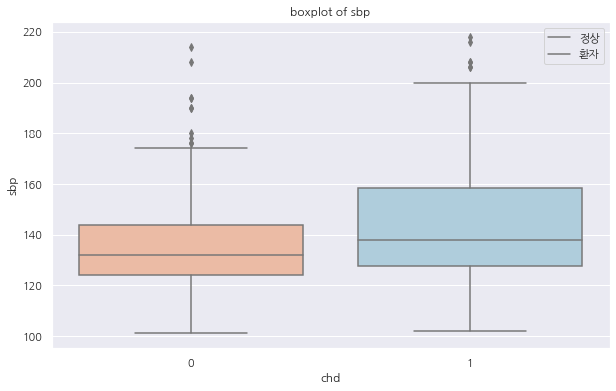

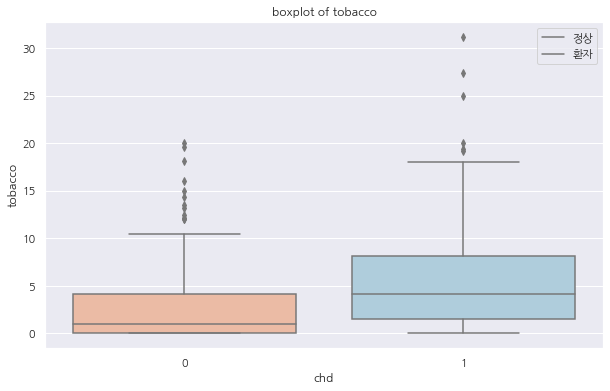

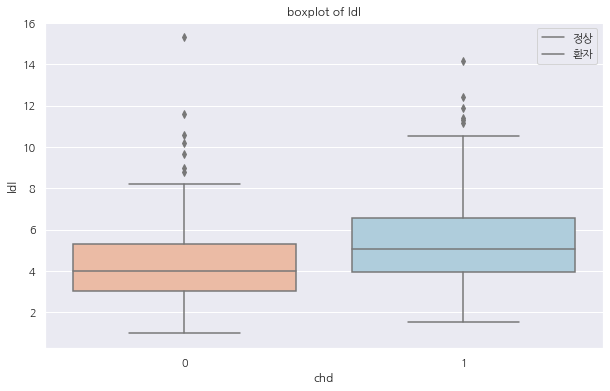

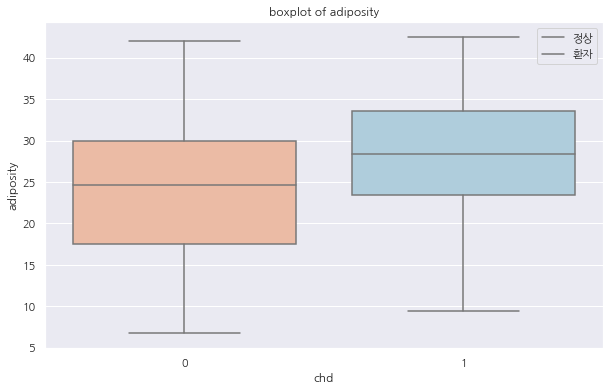

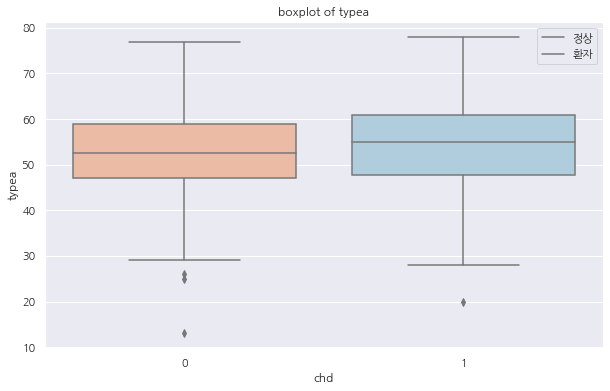

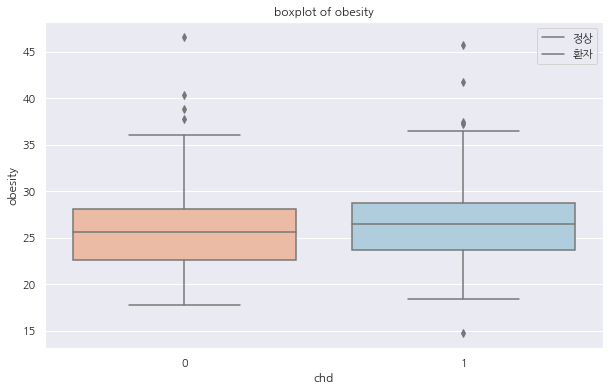

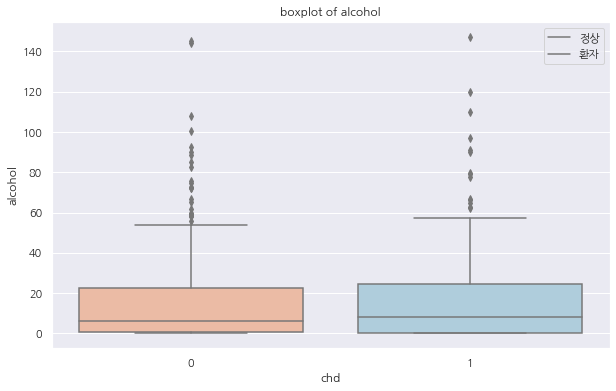

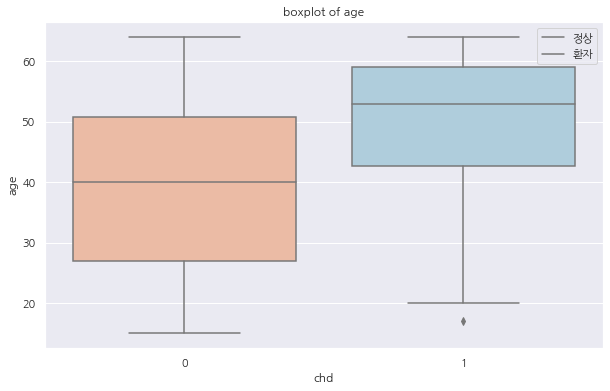

In [213]:
numeric_feature = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

for col in numeric_feature:
    
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x="chd",y= df[col],data=df,  palette = "RdBu")
       
    plt.legend(['정상','환자'])
    plt.title('boxplot of '+str(col))
    plt.show()


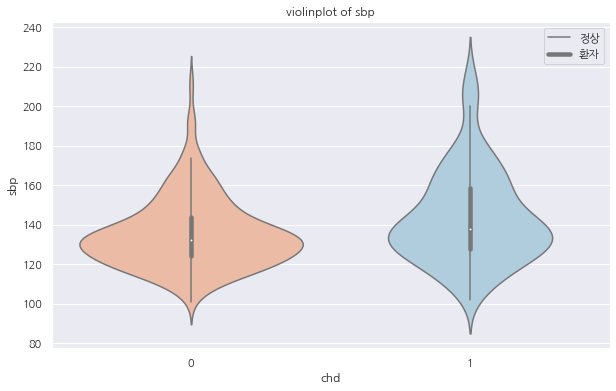

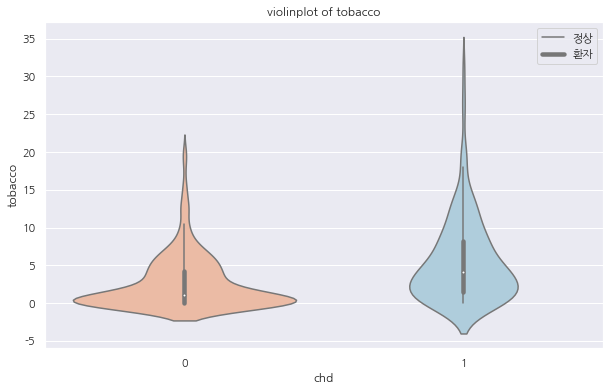

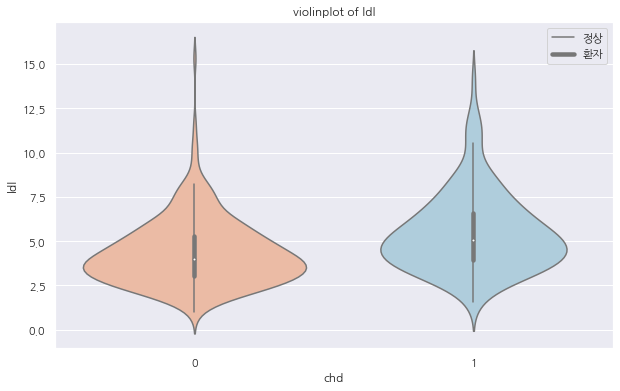

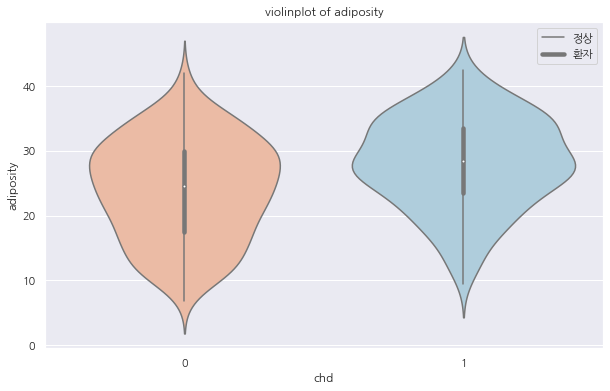

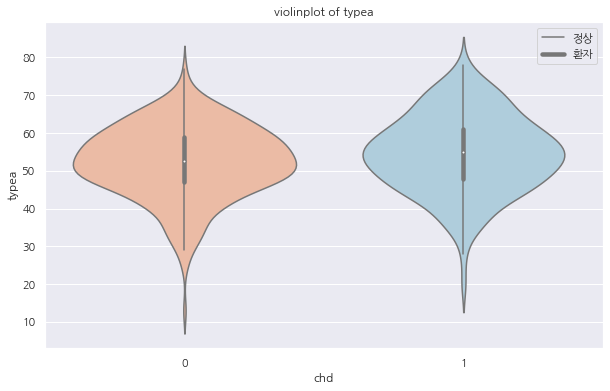

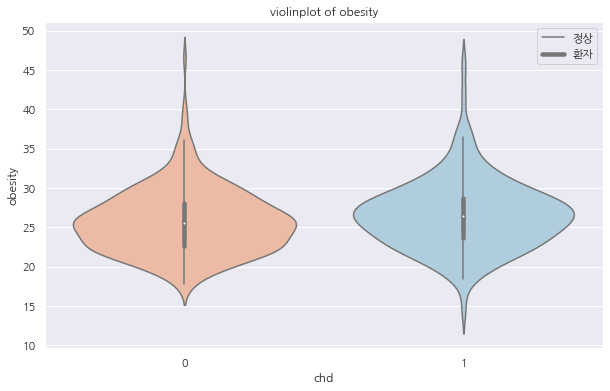

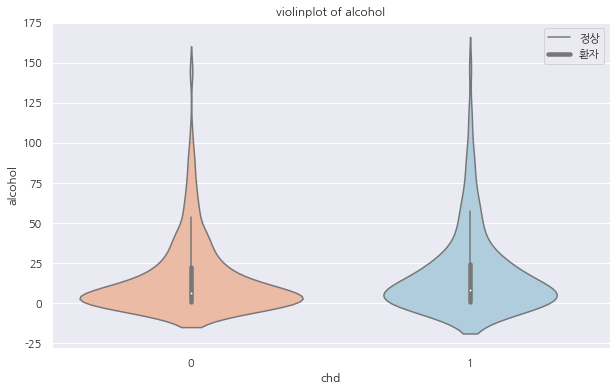

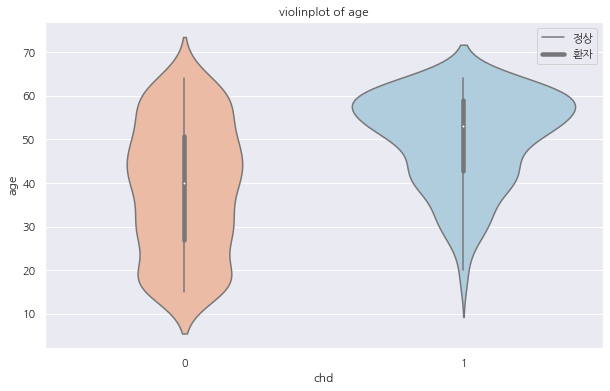

In [215]:
numeric_feature = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

for col in numeric_feature:
    
    plt.figure(figsize=(10, 6))
    
    sns.violinplot(x="chd",y= df[col],data=df,palette = "RdBu")
       
    plt.legend(['정상','환자'])
    plt.title('violinplot of '+str(col))
    plt.show()


### 1. sbp

파생변수 sbp2 생성

출처: 미국심장학회·심장협회(ACC·AHA) 2017년 고혈압 가이드라인

http://m.mostonline.co.kr/news/articleView.html?idxno=96404

https://www.verywellhealth.com/average-blood-pressure-by-age-5085328

In [217]:
df['sbp2'] = 0

df.loc[df['sbp']<120,'sbp2']='정상혈압'
df.loc[(df['sbp']>=120) & (df['sbp']<130),'sbp2']='고혈압 전단계'
df.loc[(df['sbp']>=130) & (df['sbp']<140),'sbp2']='고혈압 1기'
df.loc[df['sbp']>=140,'sbp2']='고혈압 2기'

df['sbp2']=df['sbp2'].astype('category')

In [218]:
df['sbp2'].value_counts().to_frame()

,sbp2
고혈압 2기,172
고혈압 1기,121
고혈압 전단계,102
정상혈압,67


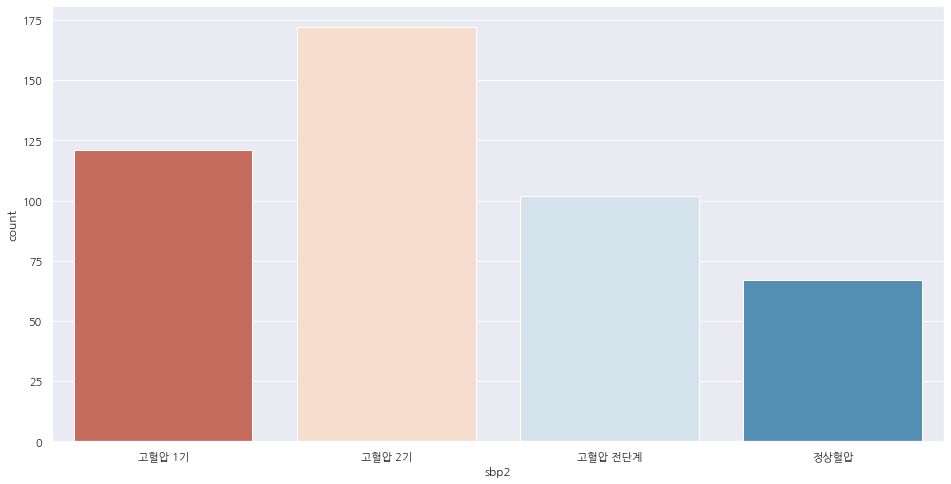

In [233]:
plt.figure(figsize = (16,8))
sns.countplot(x="sbp2", data=df,palette = "RdBu")
plt.show()

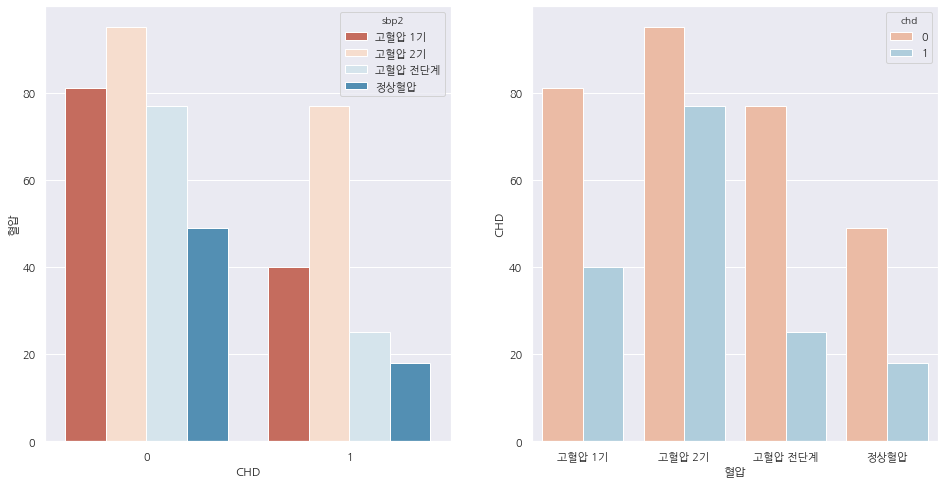

In [232]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='chd',hue='sbp2',data=df,palette='RdBu')
cnt.set_xlabel("CHD")
cnt.set_ylabel("혈압")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='chd',x='sbp2',data=df,palette='RdBu')
cnt.set_ylabel("CHD")
cnt.set_xlabel("혈압")

plt.show()

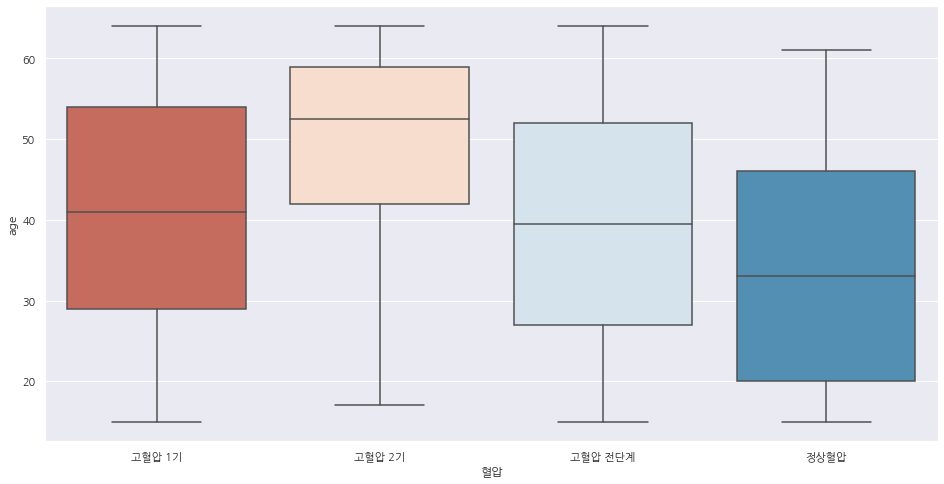

In [221]:
plt.figure(figsize = (16,8))

box=sns.boxplot(y='age',x='sbp2',data=df,palette='RdBu')
box.set_ylabel("age")
box.set_xlabel("혈압")

plt.show()

파생변수 sbp_age

연령별 남성 혈압 이상 여부

1: 비정상 0 : 정상

연령별 남성 정상혈압 미국 기준
https://www.verywellhealth.com/average-blood-pressure-by-age-5085328
https://www.onhealth.com/content/1/blood_pressure_chart_reading_range_age_men_women


In [335]:
df['sbp_age']=0

df.loc[(df['age']<=25) & (df['sbp']>120.5),'sbp_age']= 1
df.loc[(df['age']>=26) & (df['age']<=30) & (df['sbp']>119.5),'sbp_age']=1
df.loc[(df['age']>=31) & (df['age']<=35) & (df['sbp']>114.5),'sbp_age']=1
df.loc[(df['age']>=36) & (df['age']<=40) & (df['sbp']>120.5),'sbp_age']=1
df.loc[(df['age']>=41) & (df['age']<=45) & (df['sbp']>115.5),'sbp_age']=1
df.loc[(df['age']>=46) & (df['age']<=50) & (df['sbp']>119.5),'sbp_age']=1
df.loc[(df['age']>=51) & (df['age']<=55) & (df['sbp']>125.5),'sbp_age']=1
df.loc[(df['age']>=56) & (df['age']<=60) & (df['sbp']>129.5),'sbp_age']=1
df.loc[(df['age']>=61) & (df['age']<=65) & (df['sbp']>143.5),'sbp_age']=1

# df['sbp_age']=df['sbp_age'].astype('category')

In [336]:
df['sbp_age'].value_counts().to_frame()

,sbp_age
1,360
0,102


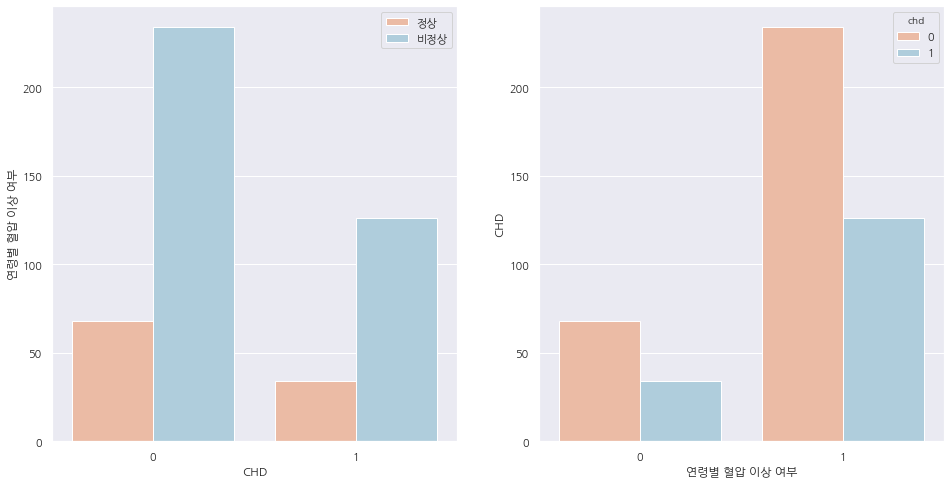

In [322]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='chd',hue='sbp_age',data=df,palette='RdBu')
plt.legend(['정상','비정상'], loc='best')
cnt.set_xlabel("CHD")
cnt.set_ylabel("연령별 혈압 이상 여부")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='chd',x='sbp_age',data=df,palette='RdBu')
cnt.set_ylabel("CHD")
cnt.set_xlabel("연령별 혈압 이상 여부")

plt.show()

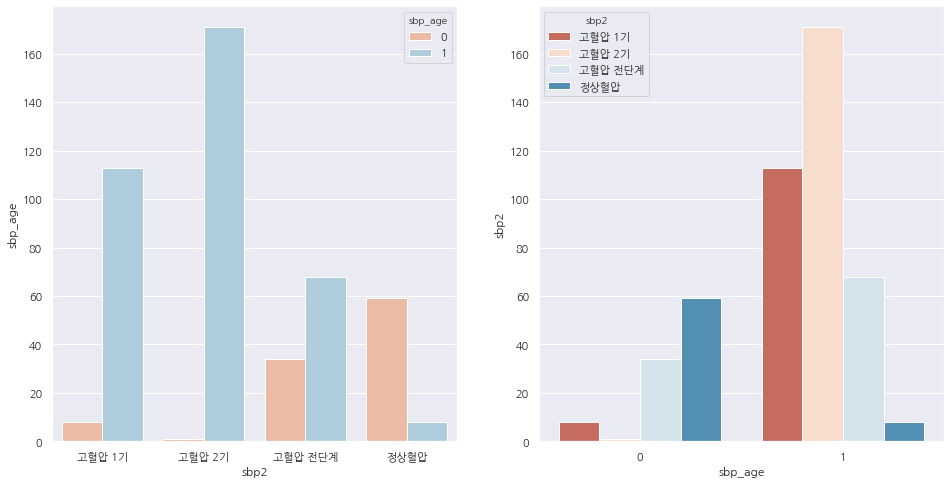

In [323]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='sbp2',hue='sbp_age',data=df,palette='RdBu')
cnt.set_xlabel("sbp2")
cnt.set_ylabel("sbp_age")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='sbp2',x='sbp_age',data=df,palette='RdBu')
cnt.set_ylabel("sbp2")
cnt.set_xlabel("sbp_age")

plt.show()

## 2. tobacco

흡연 비흡연 여부 기준은?

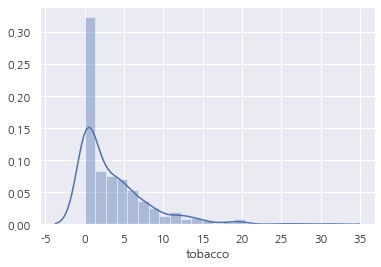

In [309]:
sns.distplot(df['tobacco'])
plt.show()

In [310]:
df['tobacco'].describe().T

count    462.000000
mean       3.635649
std        4.593024
min        0.000000
25%        0.052500
50%        2.000000
75%        5.500000
max       31.200000
Name: tobacco, dtype: float64

In [311]:
df[(df['tobacco']== 0)]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,sbp2,sbp_age,age2
8,114,0.0,3.83,19.40,Present,49,24.86,2.49,29,0,정상혈압,1,20대
9,132,0.0,5.80,30.96,Present,69,30.11,0.00,53,1,고혈압 1기,0,50대
12,118,0.0,1.88,10.05,Absent,59,21.57,0.00,17,0,정상혈압,1,10대
13,132,0.0,1.87,17.21,Absent,49,23.63,0.97,15,0,고혈압 1기,0,10대
29,146,0.0,6.62,25.69,Absent,60,28.07,8.23,63,1,고혈압 2기,0,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,120,0.0,3.98,13.19,Present,47,21.89,0.00,16,0,고혈압 전단계,1,10대
446,142,0.0,4.32,25.22,Absent,47,28.92,6.53,34,1,고혈압 2기,0,30대
447,130,0.0,1.88,12.51,Present,52,20.28,0.00,17,0,고혈압 1기,0,10대
451,120,0.0,2.77,13.35,Absent,67,23.37,1.03,18,0,고혈압 전단계,1,10대


In [312]:
df[(df['tobacco']<1)]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,sbp2,sbp_age,age2
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,고혈압 2기,0,60대
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,정상혈압,1,40대
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0,정상혈압,1,20대
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1,고혈압 1기,0,50대
12,118,0.00,1.88,10.05,Absent,59,21.57,0.00,17,0,정상혈압,1,10대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,120,0.00,2.77,13.35,Absent,67,23.37,1.03,18,0,고혈압 전단계,1,10대
454,146,0.64,4.82,28.02,Absent,60,28.11,8.23,39,1,고혈압 2기,0,30대
456,170,0.40,4.11,42.06,Present,56,33.10,2.06,57,0,고혈압 2기,0,50대
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,고혈압 2기,0,50대


파생변수 smoker

In [314]:
df['smoker']=0

df.loc[(df['tobacco']==0) ,'smoker']= 0
df.loc[(df['tobacco']>0) ,'smoker']= 1

# df['smoker']=df['smoker'].astype('category')

df['smoker'].value_counts().to_frame()

,smoker
1,355
0,107


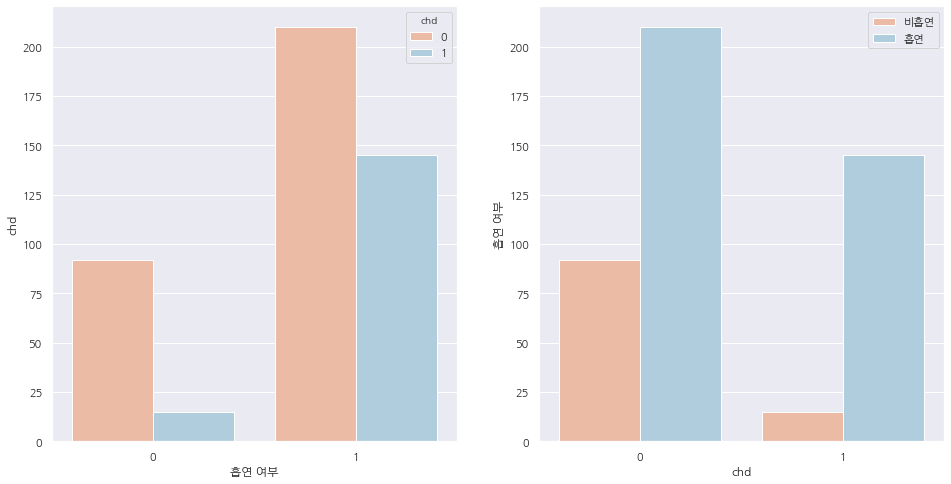

In [355]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='smoker',hue='chd',data=df,palette='RdBu')
cnt.set_xlabel("흡연 여부")
cnt.set_ylabel("chd")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='smoker',x='chd',data=df,palette='RdBu')
plt.legend(['비흡연','흡연'], loc='best')
cnt.set_ylabel("흡연 여부")
cnt.set_xlabel("chd")

plt.show()


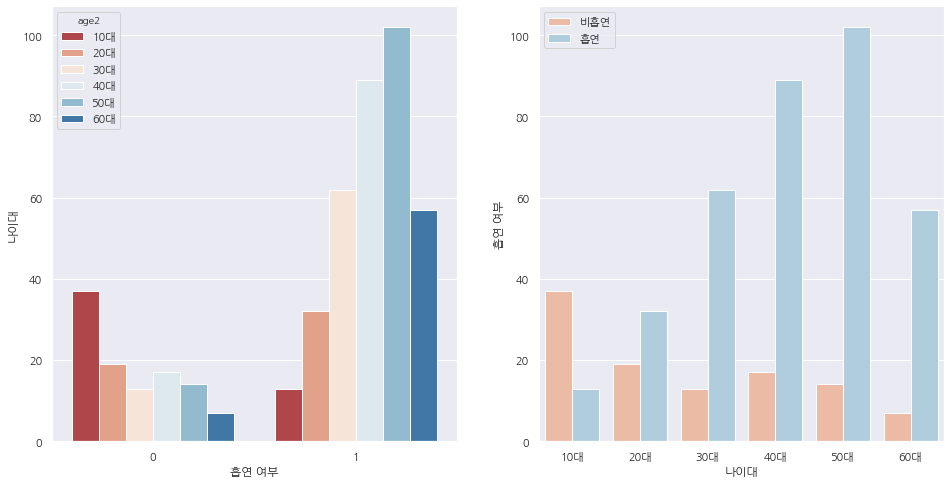

In [359]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='smoker',hue='age2',data=df,palette='RdBu')
cnt.set_xlabel("흡연 여부")
cnt.set_ylabel("나이대")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='smoker',x='age2',data=df,palette='RdBu')
plt.legend(['비흡연','흡연'], loc='best')
cnt.set_ylabel("흡연 여부")
cnt.set_xlabel("나이대")

plt.show()

# 3. ldl

<Figure size 1152x576 with 0 Axes>

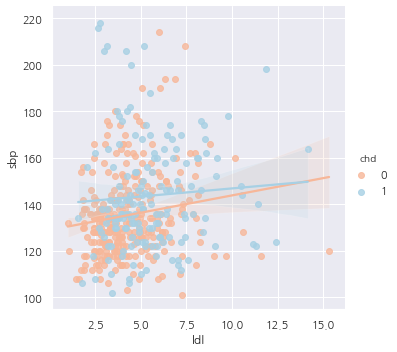

In [316]:
plt.figure(figsize = (16,8))

sns.lmplot(data = df, x = 'ldl', y = 'sbp',hue = 'chd',palette='RdBu')
plt.show()

# 5. famhist

Text(0, 0.5, 'chd')

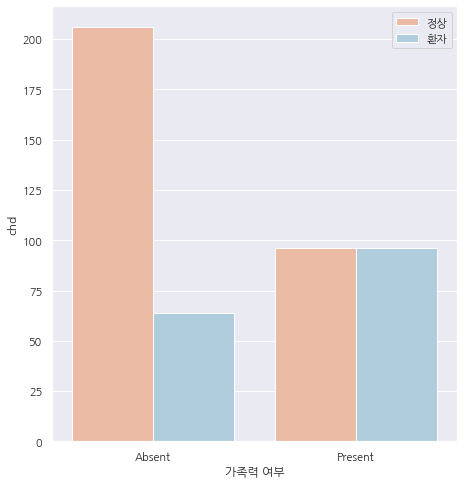

In [370]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='famhist',hue='chd',data=df,palette='RdBu')
plt.legend(['정상','환자'], loc='best')
cnt.set_xlabel("가족력 여부")
cnt.set_ylabel("chd")

Text(0, 0.5, '혈압')

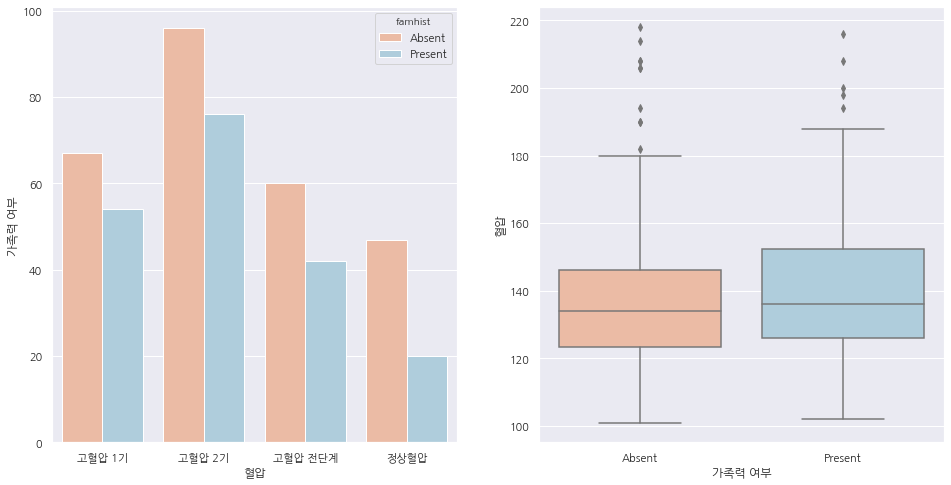

In [366]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='sbp2',hue='famhist',data=df,palette='RdBu')
cnt.set_xlabel("혈압")
cnt.set_ylabel("가족력 여부")

ax = plt.subplot(1,2,2)
box=sns.boxplot(y='sbp',x='famhist',data=df,palette='RdBu')
box.set_xlabel("가족력 여부")
box.set_ylabel("혈압")

# 9.  age

시각화를 위해 나이대별 범주형 변수 생성

In [229]:
df['age2']=0

df.loc[(df['age']<=19) ,'age2']='10대'
df.loc[(df['age']>=20) & (df['age']<=29) ,'age2']='20대'
df.loc[(df['age']>=30) & (df['age']<=39) ,'age2']='30대'
df.loc[(df['age']>=40) & (df['age']<=49),'age2']='40대'
df.loc[(df['age']>=50) & (df['age']<=59) ,'age2']='50대'
df.loc[(df['age']>=60) & (df['age']<=69),'age2']='60대'
df['age2']=df['age2'].astype('category')

df['age2'].value_counts().to_frame()

,age2
50대,116
40대,106
30대,75
60대,64
20대,51
10대,50


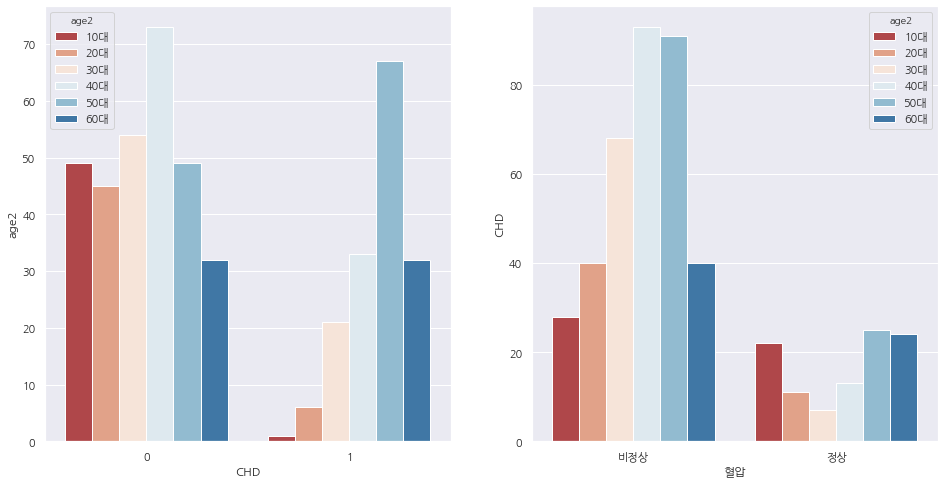

In [230]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='chd',hue='age2',data=df,palette='RdBu')
cnt.set_xlabel("CHD")
cnt.set_ylabel("age2")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='age2',x='sbp_age',data=df,palette='RdBu')
cnt.set_ylabel("CHD")
cnt.set_xlabel("혈압")

plt.show()

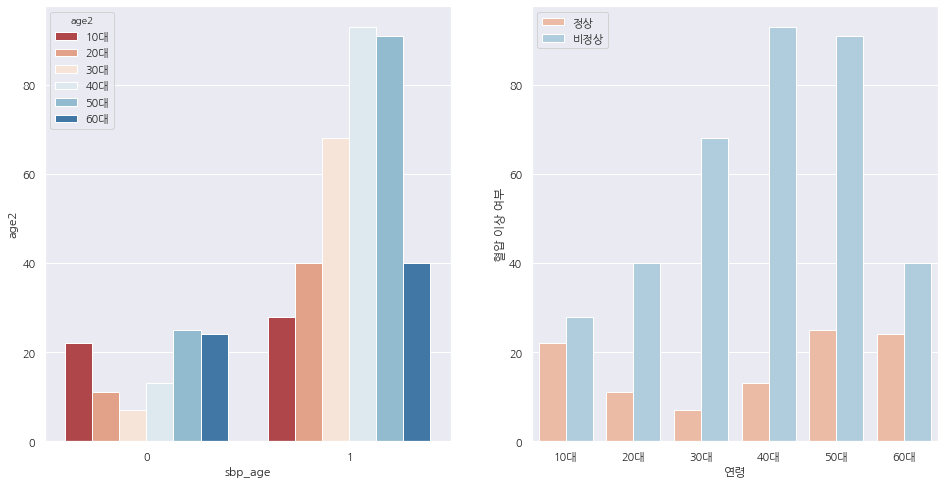

In [371]:
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='sbp_age',hue='age2',data=df,palette='RdBu')
cnt.set_xlabel("sbp_age")
cnt.set_ylabel("age2")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='sbp_age',x='age2',data=df,palette='RdBu')
plt.legend(['정상','비정상'], loc='best')
cnt.set_ylabel("혈압 이상 여부")
cnt.set_xlabel("연령")

plt.show()


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sbp        462 non-null    int64   
 1   tobacco    462 non-null    float64 
 2   ldl        462 non-null    float64 
 3   adiposity  462 non-null    float64 
 4   famhist    462 non-null    category
 5   typea      462 non-null    int64   
 6   obesity    462 non-null    float64 
 7   alcohol    462 non-null    float64 
 8   age        462 non-null    int64   
 9   chd        462 non-null    int64   
 10  sbp2       462 non-null    category
 11  sbp_age    462 non-null    int64   
 12  age2       462 non-null    category
 13  smoker     462 non-null    int64   
dtypes: category(3), float64(5), int64(6)
memory usage: 41.7 KB


In [238]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd', 'sbp2', 'sbp_age', 'age2'],
      dtype='object')

X 인코딩

In [337]:
X = df.drop(columns=['chd','age2'])
y = df[df.columns[9]]

In [338]:
X_incoding = pd.get_dummies(X, columns = ['famhist', 'sbp2'])

X_incoding.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,sbp_age,smoker,famhist_Absent,famhist_Present,sbp2_고혈압 1기,sbp2_고혈압 2기,sbp2_고혈압 전단계,sbp2_정상혈압
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1,0,1,0,1,0,0
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,1,0,0,1,0,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1,0,1,0,0,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1,0,1,0,1,0,0
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1,0,1,1,0,0,0


In [339]:
y.unique()

array([1, 0], dtype=int64)

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X_incoding, y, test_size=0.25, stratify=data_y, random_state=123456)

In [341]:
X_train

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,sbp_age,smoker,famhist_Absent,famhist_Present,sbp2_고혈압 1기,sbp2_고혈압 2기,sbp2_고혈압 전단계,sbp2_정상혈압
55,152,5.99,7.99,32.48,45,26.57,100.32,48,1,1,1,0,0,1,0,0
226,112,4.46,7.18,26.25,69,27.29,0.00,32,0,1,0,1,0,0,0,1
54,156,3.00,1.82,27.55,60,23.91,54.00,53,1,1,1,0,0,1,0,0
51,134,2.50,3.66,30.90,52,27.19,23.66,49,1,1,1,0,1,0,0,0
207,124,4.00,6.65,30.84,54,28.40,33.51,60,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,146,1.35,6.39,34.21,51,26.43,0.00,59,1,1,1,0,0,1,0,0
435,136,0.00,1.77,20.37,45,21.51,2.06,16,1,0,1,0,1,0,0,0
347,128,5.40,2.36,12.98,51,18.36,6.69,61,0,1,1,0,0,0,1,0
69,122,0.00,3.37,16.10,67,21.06,0.00,32,1,0,1,0,0,0,1,0


## XGBoost

In [244]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import XGBClassifier
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [262]:
# XGBoost 예측모형
xgb_model = xgb.XGBClassifier(silent=False, 
                              booster='gbtree',
                              scale_pos_weight=1,
                              learning_rate=0.01,  
                              colsample_bytree = 0.4,
                              subsample = 0.6,
                              objective='binary:logistic', 
                              n_estimators=100, 
                              max_depth=7, 
                              gamma=10, 
                              seed=100)

In [342]:
pred00 = xgb_model.fit(X_train,y_train).predict(X_test)
print(classification_report(y_test, pred00))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        76
           1       0.69      0.28      0.39        40

    accuracy                           0.71       116
   macro avg       0.70      0.60      0.60       116
weighted avg       0.70      0.71 

In [343]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    print('정확도 : {0:2f}, 정밀도 : {1:2f}, 재현율 : {2:2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:2f}, auc : {1:2f}'.format(f1, roc_score))

In [344]:
metrics(y_test, pred00)

정확도 : 0.706897, 정밀도 : 0.687500, 재현율 : 0.275000
f1-score : 0.392857, auc : 0.604605


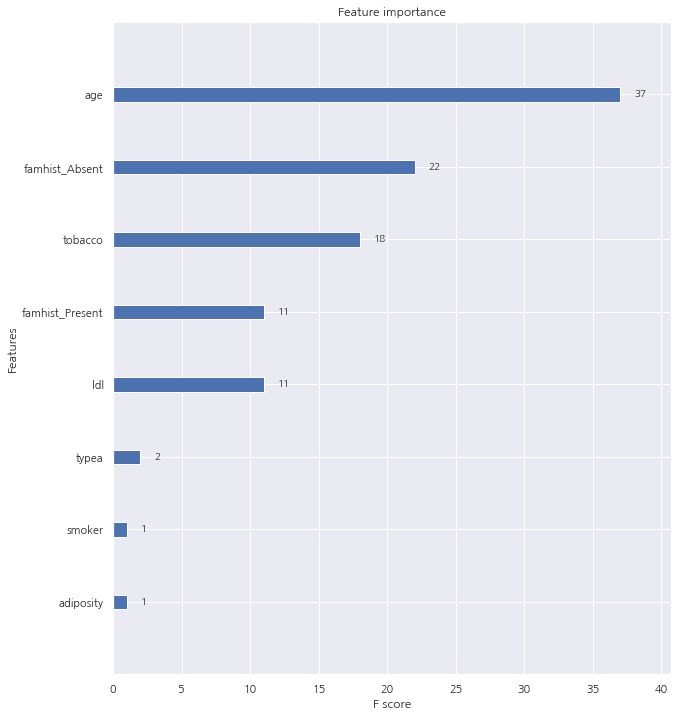

In [345]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

plt.show()

## RandomForest

In [367]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [368]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.691
Mean accuracy score: 0.716


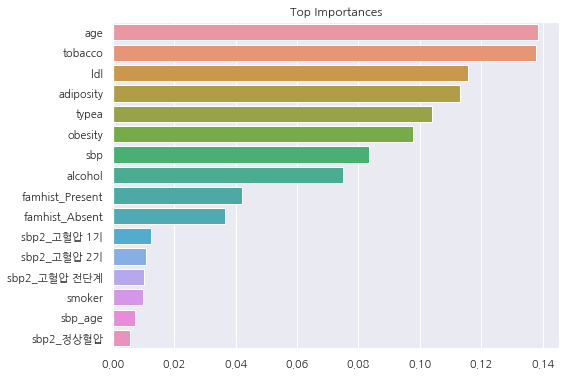

In [369]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## SHAP Value

In [275]:
!pip install shap
import shap

In [349]:
explainer = shap.TreeExplainer(xgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산

In [350]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [351]:
# 전체 검증 데이터 셋에 대해서 적용
shap.force_plot(explainer.expected_value, shap_values, X_test) 

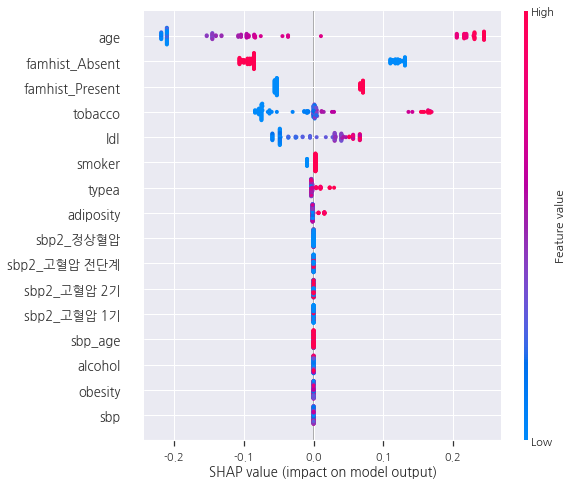

In [352]:
shap.summary_plot(shap_values, X_test)

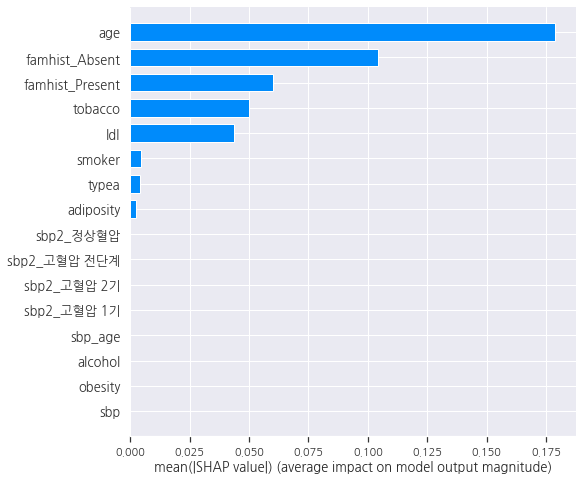

In [353]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")